### Dataset description

- Context
IMDB Dataset of top 1000 movies and tv shows.

#### Libraries

In [1]:
# Import the necessary Python libraries, such as pandas, numpy, and matplotlib/seaborn for data manipulation and visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#### Overview of the dataset

In [2]:
df = pd.read_csv("imdb_top_1000.csv")
df.shape

(1000, 16)

In [3]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [4]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#### Data cleaning

In [5]:
#missing values per column
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
df.dropna(inplace=True) # Drop rows with missing values in the original DataFrame
df.isna().sum()
df.shape #286 movies removed.

(714, 16)

In [7]:
df.duplicated().sum() # Check for duplicate rows

0

In [8]:
df.dtypes
    # some data types must be converted.
        # Released_Year to int
        # Runtime to int

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [9]:
df['Released_Year'].unique() 

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1965', '1962', '1959', '1958', '1952', '1944',
       '1941', '2013', '2007', '2005', '1989', '1963', '1950', '1948',
       '2015', '1996', '1982', '1978', '1967', '1951', '1949', '1940',
       '1939', '1934', '1970', '1969', '1961', '1946', '1930', '1938',
       '1933', 'PG', '1953'], dtype=object)

In [10]:
# Convert the 'Released_Year' column to integers and handle non-numeric values by setting them to NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')

In [11]:
# Convert the 'RunTime' column to integers and removing the "min" text from the values
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Runtime'].unique() 
df.rename(columns={'Runtime': 'Runtime_in_minutes'}, inplace=True)

In [12]:
# Convert 'Gross' column to integers and handle missing values
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)
df['Gross'].fillna(0, inplace=True)
gross_mean = df[df['Gross'] != 0]['Gross'].mean() # Calculate the mean of 'Gross' excluding the zeros
df['Gross'].replace(0, gross_mean, inplace=True) # Fill zeros in 'Gross' with the calculated mean
df['Gross'] = df['Gross'].astype(int) # Convert 'Gross' column to integers (if needed)

In [13]:
# Check again the data types of the DataFrame
print(df.dtypes)

Poster_Link            object
Series_Title           object
Released_Year           Int64
Certificate            object
Runtime_in_minutes      int32
Genre                  object
IMDB_Rating           float64
Overview               object
Meta_score            float64
Director               object
Star1                  object
Star2                  object
Star3                  object
Star4                  object
No_of_Votes             int64
Gross                   int32
dtype: object


In [14]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime_in_minutes,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


#### Exploratory Data Analysis

In [15]:
df.describe()

,Released_Year,Runtime_in_minutes,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,713.000000,714.000000,714.000000,714.000000,7.140000e+02,7.140000e+02
mean,1995.736325,123.715686,7.937115,77.158263,3.561348e+05,7.851359e+07
std,18.598222,25.887535,0.293278,12.401144,3.539011e+05,1.149780e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1987.000000,104.250000,7.700000,70.000000,9.600975e+04,6.157408e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.366025e+05,3.485015e+07
75%,2010.000000,136.000000,8.100000,86.000000,5.077922e+05,1.024641e+08
max,2019.000000,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


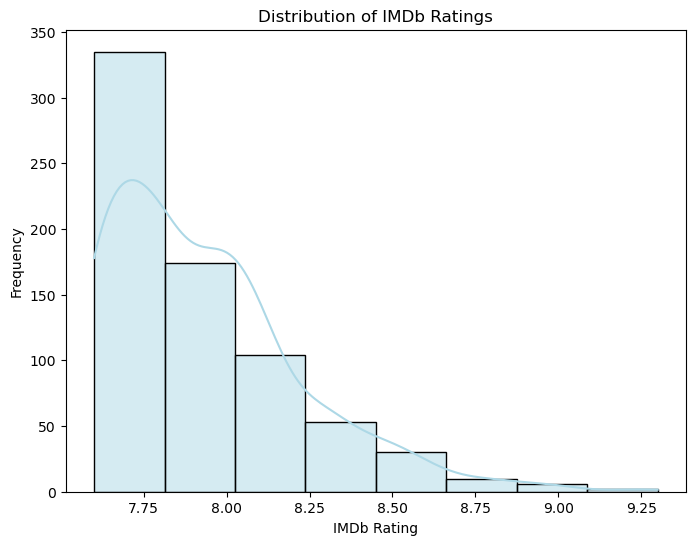

In [16]:
# Distribution of IMDb Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='IMDB_Rating', bins=8, kde=True, color = 'lightblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

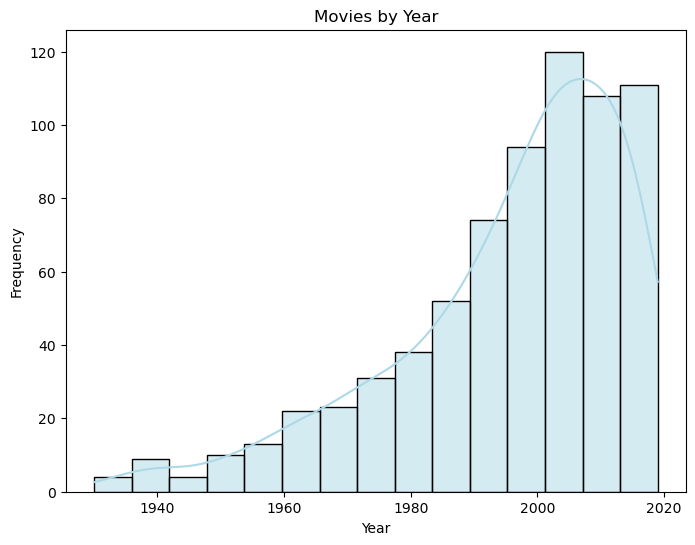

In [17]:
# Movies by year
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Released_Year', bins=15, kde=True, color = 'lightblue')
plt.title('Movies by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

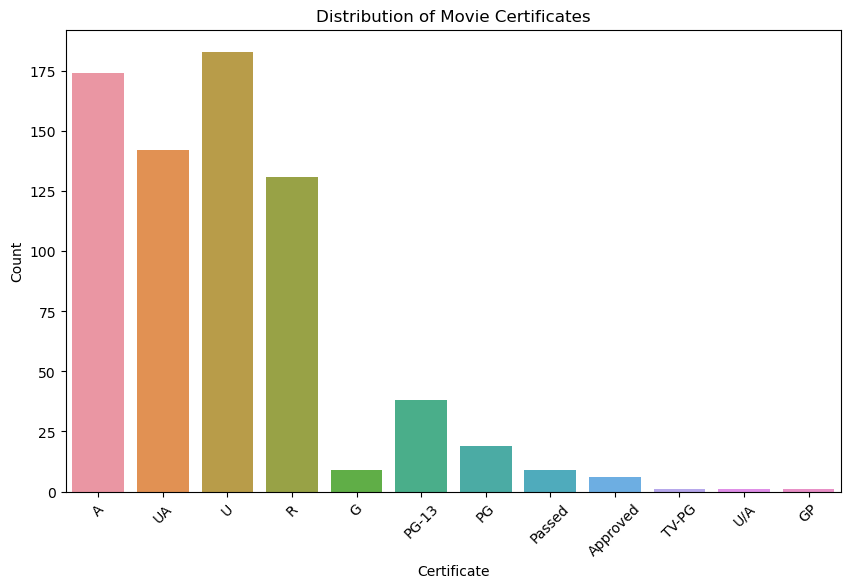

In [18]:
#Distribution of Movie Certificates
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Certificate')
plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

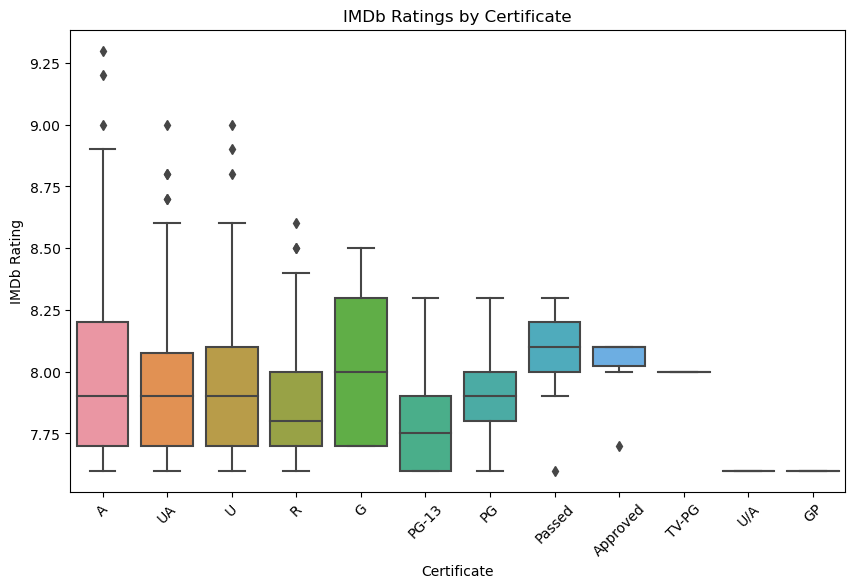

In [19]:
# Example for a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Certificate', y='IMDB_Rating')
plt.title('IMDb Ratings by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime_in_minutes', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

### Movies with higher IMDb ratings tend to have higher gross earnings?

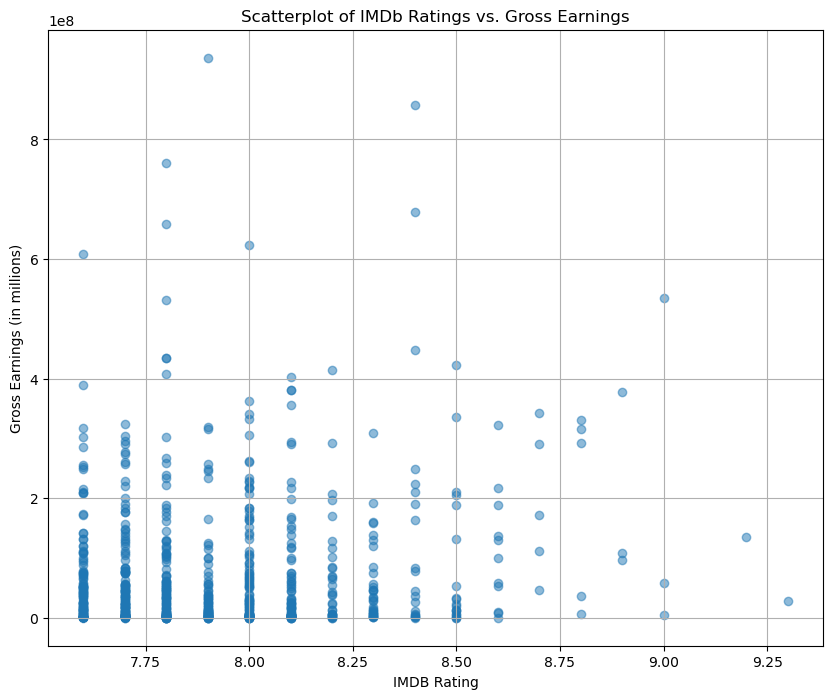

In [21]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
# Scatter plot
plt.scatter(df['IMDB_Rating'], df['Gross'], alpha=0.5) 
# Labels and title
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings (in millions)')
plt.title('Scatterplot of IMDb Ratings vs. Gross Earnings')
# Show the plot
plt.grid(True)  # Add gridlines if you prefer
plt.show()

In [22]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df['IMDB_Rating'], df['Gross'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation Coefficient: 0.12599157738544198
P-value: 0.0007404436262814318


The correlation coefficient is approximately 0.126. 
Since it's positive, it indicates a positive correlation between IMDb ratings and gross earnings. 
The p-value is approximately 0.001, which is less than the common significance level of 0.05. This suggests that the correlation observed is statistically significant.


CONCLUSION: There is a statistically significant positive correlation (albeit weak) between IMDb ratings and gross earnings. This means that movies with higher IMDb ratings tend to, on average, have higher gross earnings. However, it's important to note that while the correlation is statistically significant, the strength of the relationship is relatively weak. Other factors likely also play a role in determining a movie's earnings.

### The genre of a movie has an impact on its IMDb rating?

In [23]:
df['Genre'].unique() 

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Adventure, Comedy, Sci-Fi',
       'Horror, Mystery, Thriller', 'Drama, Romance, War',
       'Comedy, Drama, Family', 'Animation, Drama, Fantasy',
       'Animation, Action, Adventure', 'Drama, Western',
       'Action, Adventure', 'Comedy, Drama', 'Drama, Mystery, Thriller',
       'Action, Drama, Mystery', 'Mystery, Thr

In [24]:
df2 = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
df2.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime_in_minutes,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


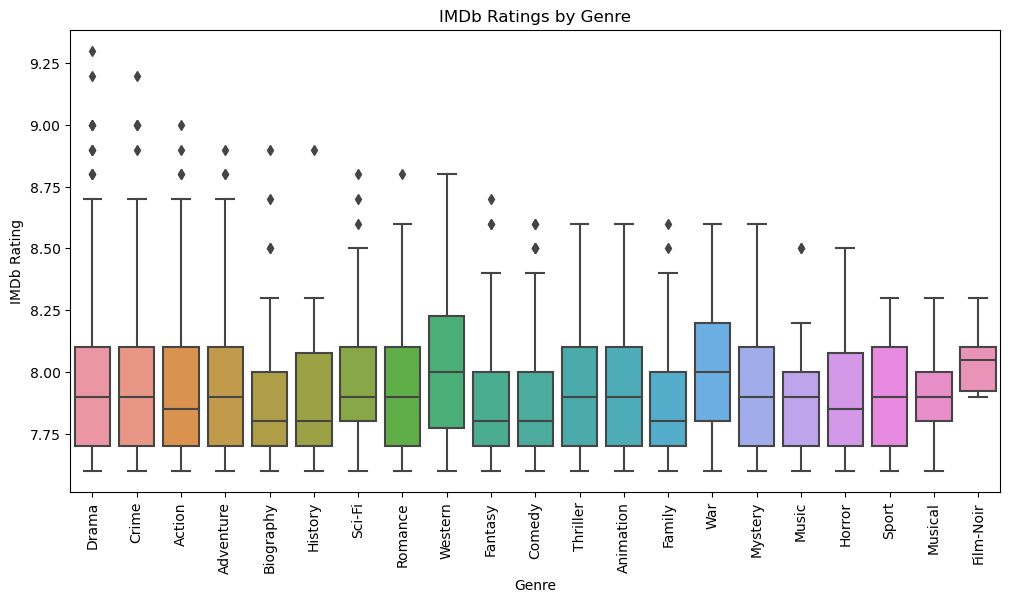

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Genre', y='IMDB_Rating')
plt.title('IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90)
plt.show()

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols('IMDB_Rating ~ C(Genre)', data=df).fit()

# Perform ANOVA analysis
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

             sum_sq     df        F    PR(>F)
C(Genre)  14.602576  171.0  0.99059  0.521762
Residual  46.723881  542.0      NaN       NaN


The F-statistic is relatively small (0.991). 
#### The variation between genres is not significantly greater than the variation within genres.

The p-value (0.522) is greater than the commonly used significance level of 0.05. 
#### There are no statistically significant differences in IMDb ratings among different movie genres.

### Movies with longer runtimes tend to have higher IMDb ratings?

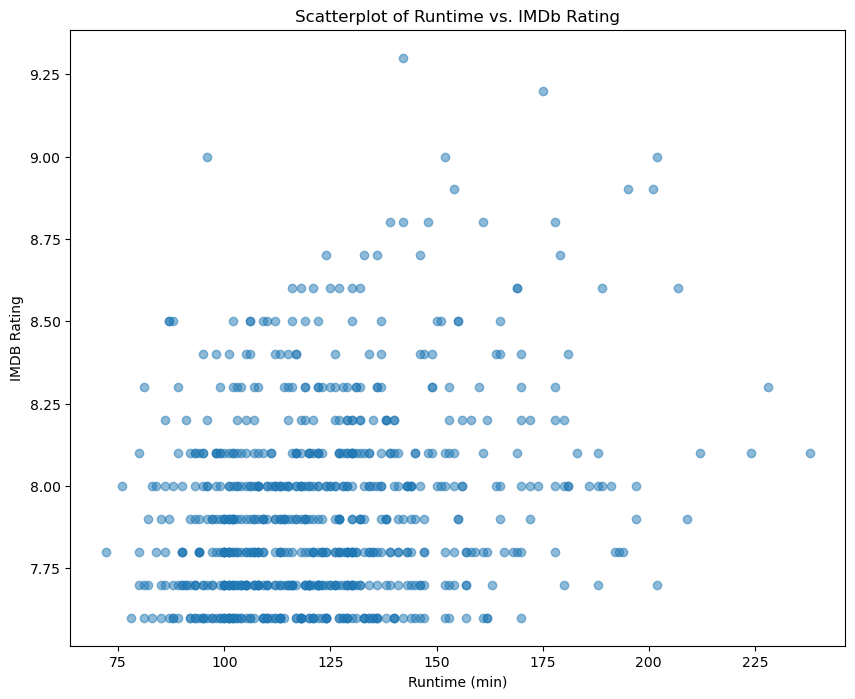

In [27]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
# Scatter plot
plt.scatter(df['Runtime_in_minutes'], df['IMDB_Rating'], alpha=0.5) 
# Labels and title
plt.xlabel('Runtime (min)')
plt.ylabel('IMDB Rating')
plt.title('Scatterplot of Runtime vs. IMDb Rating')
# Show the plot
plt.grid(False)  # Add gridlines if you prefer
plt.show()

In [28]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(df['Runtime_in_minutes'], df['IMDB_Rating'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')

Correlation Coefficient: 0.2582238124791613
P-value: 2.4343246580928826e-12


The correlation coefficient (r) is approximately 0.258. This means that, on average, movies with longer runtimes tend to have higher IMDb ratings.

The p-value is extremely small (approximately 2.43e-12), far below any common significance level (e.g., 0.05). 
Conclusion:

There is a highly statistically significant positive correlation between movie runtimes and IMDb ratings. This means that movies with longer runtimes tend to, on average, have higher IMDb ratings.